# Analyse des dialogues dans l'Avare de Molière

Auteur : Emile Pierret

Nous proposons d'étudier la part de dialogue de chacun des personnages de l'Avare de Molière.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import copy

Voici la liste des versions de package utilisées :
- Version numpy       : 1.15.2
- Version matplotlib  : 2.2.3
- Version copy        : 1.15.2
- Version python      : 3.6.4

# 1. Etude des données

## Fichier du texte

Le texte utilisé a été télécharger au lien suivant: http://dramacode.github.io/markdown/moliere_avare.txt, le 1er avril 2023 à 14h09. Il est disponible sur le git, au nom de "moliere_avare.txt"

In [2]:
fichier = open("moliere_avare.txt", "r")

In [4]:
lignes = fichier.readlines()

Voici, ci-dessous, un extrait du texte :

In [5]:
for ligne in lignes[:50] :
    print(ligne)

---

identifier: moliere_avare  

creator: Molière.  

date: 1668  

title: L'Avare. Comédie  

---





L'AVARE,



COMÉDIE.



Par J.B.P. MOLIÈRE.



À PARIS, Chez JEAN RIBOU, au Palais, vis à vis la Porte de l'Église de la Sainte Chapelle, à l'Image Saint-Louis. M. DC. LXIX. *AVEC PRIVILÈGE DU ROI*







# ACTEURS.

 – Harpagon, Père de Cléante et d'Élise, et Amoureux de Mariane.

 – Cléante, Fils d'Harpagon, Amant de Mariane.

 – Élise, Fille d'Harpagon, Amante de Valère.

 – Valère, Fils d'Anselme, et Amant d'Élise.

 – Mariane, Amante de Cléante, et aimée d'Harpagon.

 – Anselme, Père de Valère et de Mariane.

 – Frosine, Femme d'Intrigue.

 – Maitre Simon, Courtier.

 – Maitre Jacques, Cuisinier et Cocher d'Harpagon.

 – La Flèche, Valet de Cléante.

 – Dame Claude, Servante d'Harpagon.

 – Brindavoine, laquais d'Harpagon.

 – La Merluche, laquais d'Harpagon.

 – Le commissaire, et son clerc.

La Scène est à Paris.







# L'Avare, *Comédie.*.





## Acte Premier.





### Sc

## Liste des personnages

On peut lire dans le tete ci-dessus la liste des personnages. On peut également voir que chacune de leur réplique est précédée de leur nom en majuscule. Pour faciliter le travail par la suite, on commence par faire la liste des personnages au format majuscule.

In [5]:
persos = []
for k in range(19,33) :
    l = lignes[k]
    print(l)
    i = 3
    perso = ""
    while l[i] != "," :
        perso += l[i]
        i+=1
    persos.append(perso.upper())
print(persos)

 – Harpagon, Père de Cléante et d'Élise, et Amoureux de Mariane.

 – Cléante, Fils d'Harpagon, Amant de Mariane.

 – Élise, Fille d'Harpagon, Amante de Valère.

 – Valère, Fils d'Anselme, et Amant d'Élise.

 – Mariane, Amante de Cléante, et aimée d'Harpagon.

 – Anselme, Père de Valère et de Mariane.

 – Frosine, Femme d'Intrigue.

 – Maitre Simon, Courtier.

 – Maitre Jacques, Cuisinier et Cocher d'Harpagon.

 – La Flèche, Valet de Cléante.

 – Dame Claude, Servante d'Harpagon.

 – Brindavoine, laquais d'Harpagon.

 – La Merluche, laquais d'Harpagon.

 – Le commissaire, et son clerc.

['HARPAGON', 'CLÉANTE', 'ÉLISE', 'VALÈRE', 'MARIANE', 'ANSELME', 'FROSINE', 'MAITRE SIMON', 'MAITRE JACQUES', 'LA FLÈCHE', 'DAME CLAUDE', 'BRINDAVOINE', 'LA MERLUCHE', 'LE COMMISSAIRE']


Les répliques pour Maître Simon et Maître Jacques sont précédes de leur nom, avec leurs accent circonflexes, contrairement à ce qui était indiqué dans la liste des personnages. On modifie donc la liste ci-dessous.

In [6]:
persos[7] = 'MAÎTRE SIMON'
persos[8] = 'MAÎTRE JACQUES'

## Séparation des chaînes de caractères en mots

L'objectif par la suite est de compter le nombre de mots prononcé par chaque personnage. On commence donc par écrire une fonction qui sépare une réplique en mots. Notre méthodologie est la suivante :
1. Extraire les lettres qui apparaissent dans le texte de la pièce (hors ponctuation)
2. Ecrire une fonction qui sépare une réplique donnée en la liste de ces mots, constitués de lettres.

Dans un premier temps, on fait la liste des caractères présents dans le texte puis on sélectionne manuellement ce que l'on considère comme une lettre.

In [7]:
caractères = []
for k in range(len(lignes)) :
    ligne = lignes[k]
    for i in range(len(ligne)) :
        if not(ligne[i] in caractères) :
            caractères.append(ligne[i])

Ci-dessous, la liste des caractères :

In [8]:
caractères

['-',
 '\n',
 'i',
 'd',
 'e',
 'n',
 't',
 'f',
 'r',
 ':',
 ' ',
 'm',
 'o',
 'l',
 '_',
 'a',
 'v',
 'c',
 'M',
 'è',
 '.',
 '1',
 '6',
 '8',
 'L',
 "'",
 'A',
 'C',
 'é',
 'V',
 'R',
 'E',
 ',',
 'O',
 'É',
 'D',
 'I',
 'P',
 'J',
 'B',
 'È',
 'À',
 'S',
 'h',
 'z',
 'N',
 'U',
 'u',
 's',
 'à',
 'g',
 'p',
 'X',
 '*',
 'G',
 '#',
 'T',
 '–',
 'H',
 'x',
 'F',
 'q',
 'b',
 '?',
 'j',
 '!',
 'ù',
 'y',
 'î',
 'ê',
 '\xa0',
 ';',
 'œ',
 'ç',
 'ô',
 'â',
 'û',
 'ï',
 'Q',
 '…',
 'Ê',
 'Ô',
 'Y',
 'Î',
 '<',
 '>']

Ci-dessous, la liste des caractères étant considérés comme des lettres et pouvant donc constituer un mot.

In [9]:
lettres = ['i',
 'd',
 'e',
 'n',
 't',
 'f',
 'r',
 'm',
 'o',
 'l',
 'a',
 'v',
 'c',
 'M',
 'è',
 'L',
 'A',
 'C',
 'é',
 'V',
 'R',
 'E',
 'O',
 'É',
 'D',
 'I',
 'P',
 'J',
 'B',
 'È',
 'À',
 'S',
 'h',
 'z',
 'N',
 'U',
 'u',
 's',
 'à',
 'g',
 'p',
 'X',
 'G',
 'T',
 'H',
 'x',
 'F',
 'q',
 'b',
 'j',
 'ù',
 'y',
 'î',
 'ê',
 'œ',
 'ç',
 'ô',
 'â',
 'û',
 'ï',
 'Q',
 'Ê',
 'Ô',
 'Y',
 'Î']

Voici ci-dessous la fonction de séparation des répliques en mots, suivi d'un exemple.

In [10]:
def split_string(s) :
    n = len(s)
    liste_mots = []
    k = 0
    while k < n :
        mot = ""
        while (k < n) and not (s[k] in lettres) :
            k +=1
        if k <n :
            mot += s[k]
            k+=1
            while (k < n) and (s[k] in lettres) :
                mot += s[k]
                k +=1
            k+=1
            liste_mots.append(mot)
    return liste_mots

In [11]:
print(lignes[48])
split_string(lignes[48])

Hé quoi, charmante Élise, vous devenez mélancolique, après les obligeantes assurances que vous avez eu la bonté de me donner de votre foi ?Je vous vois soupirer, hélas, au milieu de ma joie !Est-ce du regret, dites-moi, de m'avoir fait heureux ? et vous repentez-vous de cet engagement où mes feux ont pu vous contraindre ?



['Hé',
 'quoi',
 'charmante',
 'Élise',
 'vous',
 'devenez',
 'mélancolique',
 'après',
 'les',
 'obligeantes',
 'assurances',
 'que',
 'vous',
 'avez',
 'eu',
 'la',
 'bonté',
 'de',
 'me',
 'donner',
 'de',
 'votre',
 'foi',
 'Je',
 'vous',
 'vois',
 'soupirer',
 'hélas',
 'au',
 'milieu',
 'de',
 'ma',
 'joie',
 'Est',
 'ce',
 'du',
 'regret',
 'dites',
 'moi',
 'de',
 'm',
 'avoir',
 'fait',
 'heureux',
 'et',
 'vous',
 'repentez',
 'vous',
 'de',
 'cet',
 'engagement',
 'où',
 'mes',
 'feux',
 'ont',
 'pu',
 'vous',
 'contraindre']

## Structure du texte

Après une étude manuelle du texte, on constate que le pièce a la structure synthaxique suivante :

PERSONNAGE \n

réplique \n

\n

PERSONNAGE \n

réplique \n

\n


excepté pour les passages à un nouvel acte ou une nouvelle scène. On utiliser cette structure pour étudier le texte dans la suite. Cependant, en cas de présence de didascalie, cette structure n'est plus respectée. On repère donc, dans le code suivant, ces cas pathologiques dans un liste "non_habituel".

In [12]:
acte = 0
perso_prec = 0
scene = 0
k = 40
non_habituel = []
new_scene = False
while k < len(lignes) :
    l = lignes[k]
    est_perso = False
    for perso in persos :
        if perso in l :
            if not new_scene :
                if (k-perso_prec) != 3 :
                    non_habituel.append((acte,scene,k,perso_prec))
            else :
                new_scene = False
            perso_prec = k
            k+=2
    if l[:3] == '###' :
        scene +=1
        new_scene = True
        k+=4
    elif l[:2] == '##' :
        scene = 0
        acte +=1
        k+=3
    else :
        k+=1

On peut ensuite afficher ces cas non habituels.

In [13]:
for s in non_habituel :
    print(lignes[s[3]:s[2]])

['    HARPAGON.\n', 'Non, coquin, je ne dis pas cela.\n', 'À part.\n', '\n', "J'enrage.\n", 'Haut.\n', '\n', "Je demande si malicieusement tu n'irais point faire courir le bruit que j'en ai.\n", '\n']
['    HARPAGON.\n', 'Tu fais le raisonneur ; je te baillerai de ce raisonnement-ci par les oreilles.\n', 'Il lève la main pour lui donner un soufflet.\n', '\n', "Sors d'ici, encore une fois.\n", '\n']
['    HARPAGON.\n', 'Il tâte le bas de ses chausses.\n', '\n', "Ces grands hauts-de-chausses sont propres à devenir les recéleurs des choses qu'on dérobe ; et je voudrais qu'on en eût fait pendre quelqu'un.\n", '\n']
['    HARPAGON.\n', "C'est ce que je veux faire.\n", 'Il fouille dans les poches de la Flèche.\n', '\n', '\n']
['    HARPAGON.\n', "Certes, ce n'est pas une petite peine que de garder chez soi une grande somme d'argent ; et bienheureux qui a tout son fait bien placé, et ne conserve seulement que ce qu'il faut pour sa dépense. On n'est pas peu embarrassé à inventer dans toute une

On voit effectivement apparaître les didascalies telles que "'Il lève la main pour lui donner un soufflet.\n'".

Ensuite, après une étude manuelle des cas précédents, on en déduit un nombre de mots et de répliques à ajouter au calcul automatique des répliques, reposant sur la structure générale.

PERSONNAGE \n

réplique \n

\n


In [14]:
Ajouter_mots = {}
Ajouter_répliques = {}

## Harpagon
Ajouter_mots['HARPAGON'] = {}
Ajouter_répliques['HARPAGON'] = {}
#Harpagon, acte 1
Ajouter_mots['HARPAGON'][1] = {}
Ajouter_répliques['HARPAGON'][1] = {}
#Harpagon, acte 1, scène 3
Ajouter_mots['HARPAGON'][1][3] = 0
Ajouter_répliques['HARPAGON'][1][3] = 0
for k in [199,202,205,211,214,252,270] :
    Ajouter_mots['HARPAGON'][1][3] += len(split_string(lignes[k]))
Ajouter_répliques['HARPAGON'][1][3] += 5
#Harpagon, acte 1, scène 4
Ajouter_mots['HARPAGON'][1][4] = 0
Ajouter_répliques['HARPAGON'][1][4] = 0
for k in [382,385,629] :
    Ajouter_mots['HARPAGON'][1][4] += len(split_string(lignes[k]))
Ajouter_répliques['HARPAGON'][1][4] +=2
#Harpagon, acte 1, scène 5
Ajouter_mots['HARPAGON'][1][5] = 0
Ajouter_répliques['HARPAGON'][1][5] = 0
for k in [783] :
    Ajouter_mots['HARPAGON'][1][5] += len(split_string(lignes[k]))
Ajouter_répliques['HARPAGON'][1][5] += 1

#Harpagon, acte 3
Ajouter_mots['HARPAGON'][3] = {}
Ajouter_répliques['HARPAGON'][3] = {}
#Harpagon, acte 3, scène 1
Ajouter_mots['HARPAGON'][3][1] = 0
Ajouter_répliques['HARPAGON'][3][1] = 0
for k in [1340,1343,1367,1370] :
    Ajouter_mots['HARPAGON'][3][1] += len(split_string(lignes[k]))
Ajouter_répliques['HARPAGON'][3][1] += 2

#Harpagon, acte 4
Ajouter_mots['HARPAGON'][4] = {}
Ajouter_répliques['HARPAGON'][4] = {}
#Harpagon, acte 4, scène 4
Ajouter_mots['HARPAGON'][4][4] = 0
Ajouter_répliques['HARPAGON'][4][4] = 0
for k in [2355] :
    Ajouter_mots['HARPAGON'][4][4] += len(split_string(lignes[k]))
Ajouter_répliques['HARPAGON'][4][4] += 1

## Elise
Ajouter_mots['ÉLISE'] = {}
Ajouter_répliques['ÉLISE'] = {}
#Elise, acte 1
Ajouter_mots['ÉLISE'][1] = {}
Ajouter_répliques['ÉLISE'][1] = {}
#Elise, acte 1, scène 4
Ajouter_mots['ÉLISE'][1][4] = 0
Ajouter_répliques['ÉLISE'][1][4] = 0
for k in [624] :
    Ajouter_mots['ÉLISE'][1][4] += len(split_string(lignes[k]))
Ajouter_répliques['ÉLISE'][1][4] += 1

##Valère
Ajouter_mots['VALÈRE'] = {}
Ajouter_répliques['VALÈRE'] = {}
#Valère, acte 1
Ajouter_mots['VALÈRE'][1] = {}
Ajouter_répliques['VALÈRE'][1] = {}
#Valère, acte 1, scène 5
Ajouter_mots['VALÈRE'][1][5] = 0
Ajouter_répliques['VALÈRE'][1][5] = 0
for k in [813,816] :
    Ajouter_mots['VALÈRE'][1][5] += len(split_string(lignes[k]))
Ajouter_répliques['VALÈRE'][1][5] += 1

#Valère, acte 3
Ajouter_mots['VALÈRE'][3] = {}
Ajouter_répliques['VALÈRE'][3] = {}
#Valère, acte 3, scène 2
Ajouter_mots['VALÈRE'][3][2] = 0
Ajouter_répliques['VALÈRE'][3][2] = 0
for k in [1631,1663,1666] :
    Ajouter_mots['VALÈRE'][3][2] += len(split_string(lignes[k]))
Ajouter_répliques['VALÈRE'][3][2] += 2

##Frosine
Ajouter_mots['FROSINE'] = {}
Ajouter_répliques['FROSINE'] = {}
#Frosine, acte 2
Ajouter_mots['FROSINE'][2] = {}
Ajouter_répliques['FROSINE'][2] = {}
#Frosine, acte 2, scène 5
Ajouter_mots['FROSINE'][2][5] = 0
Ajouter_répliques['FROSINE'][2][5] = 0
for k in [1278,1281,1284,1292,1295,1303] :
    Ajouter_mots['FROSINE'][2][5] += len(split_string(lignes[k]))
Ajouter_répliques['FROSINE'][2][5] += 4

## Maître Jacques
Ajouter_mots['MAÎTRE JACQUES'] = {}
Ajouter_répliques['MAÎTRE JACQUES'] = {}
## Maître Jacques, acte 3
Ajouter_mots['MAÎTRE JACQUES'][3] = {}
Ajouter_répliques['MAÎTRE JACQUES'][3] = {}
## Maître Jacques, acte 3, scène 1
Ajouter_mots['MAÎTRE JACQUES'][3][1] = 0
Ajouter_répliques['MAÎTRE JACQUES'][3][1] = 0
for k in [1409,1525,1528] :
    Ajouter_mots['MAÎTRE JACQUES'][3][1] += len(split_string(lignes[k]))
Ajouter_répliques['MAÎTRE JACQUES'][3][1] += 2
## Maître Jacques, acte 3, scène 2
Ajouter_mots['MAÎTRE JACQUES'][3][2] = 0
Ajouter_répliques['MAÎTRE JACQUES'][3][2] = 0
for k in [1608] :
    Ajouter_mots['MAÎTRE JACQUES'][3][2] += len(split_string(lignes[k]))
Ajouter_répliques['MAÎTRE JACQUES'][3][2] += 1

## Maître Jacques, acte 4
Ajouter_mots['MAÎTRE JACQUES'][4] = {}
Ajouter_répliques['MAÎTRE JACQUES'][4] = {}
## Maître Jacques, acte 4, scène 4
Ajouter_mots['MAÎTRE JACQUES'][4][4] = 0
Ajouter_répliques['MAÎTRE JACQUES'][4][4] = 0
for k in [2297,2317,2320,2328] :
    Ajouter_mots['MAÎTRE JACQUES'][4][4] += len(split_string(lignes[k]))
Ajouter_répliques['MAÎTRE JACQUES'][4][4] +=3

## Cléante
Ajouter_mots['CLÉANTE'] = {}
Ajouter_répliques['CLÉANTE'] = {}
#Cléante, acte 3
Ajouter_mots['CLÉANTE'][3] = {}
Ajouter_répliques['CLÉANTE'][3] = {}
#Cléante, acte 3, scène 4
Ajouter_mots['CLÉANTE'][3][4] = 0
Ajouter_répliques['CLÉANTE'][3][4] = 0
for k in [1867] :
    Ajouter_mots['CLÉANTE'][3][4] += len(split_string(lignes[k]))
Ajouter_répliques['CLÉANTE'][3][4] +=1
#Cléante, acte 3, scène 7
Ajouter_mots['CLÉANTE'][3][7] = 0
Ajouter_répliques['CLÉANTE'][3][7] = 0
for k in [1875] :
    Ajouter_mots['CLÉANTE'][3][7] += len(split_string(lignes[k]))
Ajouter_répliques['CLÉANTE'][3][7] += 1

##La merluche
Ajouter_mots['LA MERLUCHE'] = {}
Ajouter_répliques['LA MERLUCHE'] = {}
#La merluche, acte 3
Ajouter_mots['LA MERLUCHE'][3] = {}
Ajouter_répliques['LA MERLUCHE'][3] = {}
#La merluche, acte 3, scène 9
Ajouter_mots['LA MERLUCHE'][3][9] = 0
Ajouter_répliques['LA MERLUCHE'][3][9] = 0
for k in [1971] :
    Ajouter_mots['LA MERLUCHE'][3][9] += len(split_string(lignes[k]))
Ajouter_répliques['LA MERLUCHE'][3][9] +=1

## Dénombrement mots et répliques.

Il ne reste plus qu'à traiter automatiquement la structure repérée et ajouter ensuite les cas pathologiques pour compter les mots et les répliques.

In [15]:
dico_persos = {}
for perso in persos :
    dico_persos[perso] = 0

acte = 0
perso_prec = 0
scene = 0
k = 40
new_scene = False

dico_acte_nombre_mots = {}
dico_acte_nombre_répliques = {}
while k < len(lignes) :
    l = lignes[k]
    for perso in persos :
        if perso in l :
            if not new_scene :
                if (k-perso_prec) == 3 :
                    dico_scene_nombre_mots[perso] += len(split_string(lignes[k+1]))
                    dico_scene_nombre_répliques[perso] +=1
            else :
                new_scene = False
                dico_scene_nombre_mots[perso] += len(split_string(lignes[k+1]))
                dico_scene_nombre_répliques[perso] +=1
            perso_prec = k
            k+=2
    if l[:3] == '###' :
        if scene > 0 :
            dico_acte_nombre_mots[acte][scene] = copy.deepcopy(dico_scene_nombre_mots)
            dico_acte_nombre_répliques[acte][scene] = copy.deepcopy(dico_scene_nombre_répliques)
        scene +=1
        new_scene = True
        k+=4
        dico_scene_nombre_mots = copy.deepcopy(dico_persos)
        dico_scene_nombre_répliques = copy.deepcopy(dico_persos)
    elif l[:2] == '##' :
        if acte > 0 :
            dico_acte_nombre_mots[acte][scene] = copy.deepcopy(dico_scene_nombre_mots)
            dico_acte_nombre_répliques[acte][scene] = copy.deepcopy(dico_scene_nombre_répliques)
        scene = 0
        acte +=1
        k+=3
        dico_acte_nombre_mots[acte] = {}
        dico_acte_nombre_répliques[acte] = {}
    else :
        k+=1
dico_acte_nombre_mots[acte][scene] = copy.deepcopy(dico_scene_nombre_mots)
dico_acte_nombre_répliques[acte][scene] = copy.deepcopy(dico_scene_nombre_répliques)

for perso_a_ajouter in Ajouter_mots.keys() :
    for acte_a_ajouter in Ajouter_mots[perso_a_ajouter].keys() :
        for scene_a_ajouter in Ajouter_mots[perso_a_ajouter][acte_a_ajouter].keys() :
            dico_acte_nombre_mots[acte][scene][perso_a_ajouter] += Ajouter_mots[perso_a_ajouter][acte_a_ajouter][scene_a_ajouter]
            dico_acte_nombre_répliques[acte][scene][perso_a_ajouter] += Ajouter_répliques[perso_a_ajouter][acte_a_ajouter][scene_a_ajouter]

On obtient, pour le nombre de mots par exemple, une donné de la forme suivante:

In [16]:
print(dico_acte_nombre_mots)

{1: {1: {'HARPAGON': 0, 'CLÉANTE': 0, 'ÉLISE': 491, 'VALÈRE': 630, 'MARIANE': 0, 'ANSELME': 0, 'FROSINE': 0, 'MAÎTRE SIMON': 0, 'MAÎTRE JACQUES': 0, 'LA FLÈCHE': 0, 'DAME CLAUDE': 0, 'BRINDAVOINE': 0, 'LA MERLUCHE': 0, 'LE COMMISSAIRE': 0}, 2: {'HARPAGON': 0, 'CLÉANTE': 762, 'ÉLISE': 154, 'VALÈRE': 0, 'MARIANE': 0, 'ANSELME': 0, 'FROSINE': 0, 'MAÎTRE SIMON': 0, 'MAÎTRE JACQUES': 0, 'LA FLÈCHE': 0, 'DAME CLAUDE': 0, 'BRINDAVOINE': 0, 'LA MERLUCHE': 0, 'LE COMMISSAIRE': 0}, 3: {'HARPAGON': 421, 'CLÉANTE': 0, 'ÉLISE': 0, 'VALÈRE': 0, 'MARIANE': 0, 'ANSELME': 0, 'FROSINE': 0, 'MAÎTRE SIMON': 0, 'MAÎTRE JACQUES': 0, 'LA FLÈCHE': 201, 'DAME CLAUDE': 0, 'BRINDAVOINE': 0, 'LA MERLUCHE': 0, 'LE COMMISSAIRE': 0}, 4: {'HARPAGON': 1101, 'CLÉANTE': 213, 'ÉLISE': 148, 'VALÈRE': 0, 'MARIANE': 0, 'ANSELME': 0, 'FROSINE': 0, 'MAÎTRE SIMON': 0, 'MAÎTRE JACQUES': 0, 'LA FLÈCHE': 0, 'DAME CLAUDE': 0, 'BRINDAVOINE': 0, 'LA MERLUCHE': 0, 'LE COMMISSAIRE': 0}, 5: {'HARPAGON': 243, 'CLÉANTE': 0, 'ÉLISE': 26, 

Précédemment, on a compter le nombre de mots et répliques, par acte et par scène pour chaque personnage. On fait le total pour chaque personnage dans la cellule ci-dessous.

In [17]:
Nombre_mots_perso = copy.deepcopy(dico_persos)
Nombre_répliques_perso = copy.deepcopy(dico_persos)

for perso in persos :
    for acte in dico_acte_nombre_mots.keys() :
        for scene in dico_acte_nombre_mots[acte].keys() :
            Nombre_mots_perso[perso] += dico_acte_nombre_mots[acte][scene][perso]
            Nombre_répliques_perso[perso] += dico_acte_nombre_répliques[acte][scene][perso]

# Affichage des résultats

# Nombre de mots et de répliques par personnages

Ci-dessous, le nombre de mots par personnage.

In [18]:
dict(sorted(Nombre_mots_perso.items(), key=lambda item:item[1]))

{'DAME CLAUDE': 0,
 'BRINDAVOINE': 43,
 'LA MERLUCHE': 55,
 'MAÎTRE SIMON': 197,
 'LE COMMISSAIRE': 294,
 'ANSELME': 517,
 'MARIANE': 908,
 'ÉLISE': 1052,
 'LA FLÈCHE': 1465,
 'MAÎTRE JACQUES': 1700,
 'FROSINE': 2357,
 'VALÈRE': 2791,
 'CLÉANTE': 3289,
 'HARPAGON': 5869}

Ci-dessous, le nombre de répliques par personnage.

In [19]:
dict(sorted(Nombre_répliques_perso.items(), key=lambda item:item[1]))

{'DAME CLAUDE': 0,
 'BRINDAVOINE': 3,
 'MAÎTRE SIMON': 5,
 'LA MERLUCHE': 6,
 'LE COMMISSAIRE': 17,
 'ANSELME': 20,
 'MARIANE': 30,
 'ÉLISE': 49,
 'LA FLÈCHE': 62,
 'FROSINE': 64,
 'MAÎTRE JACQUES': 87,
 'VALÈRE': 103,
 'CLÉANTE': 160,
 'HARPAGON': 354}

On remarque que Dame Claude n'adresse pas la parole et que le plus bavard est Harpagon.

## Graphe des personnages

Le graphe n'est pas exactement le même que celui proposé par [l'OBVIL](https://obvil.sorbonne-universite.fr/corpus/moliere/moliere_avare). Pour chaque scène,
- la longueur de la barre donne le nombre de mots total.
- la longueur de la barre d'un personnage donne le nombre de mots qu'il prononce dans la scène.

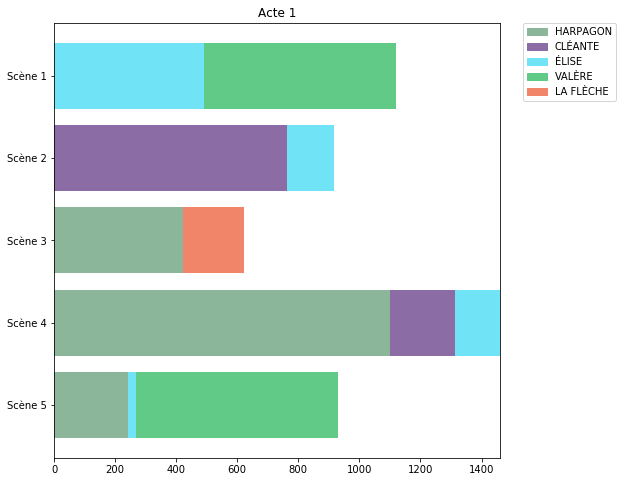

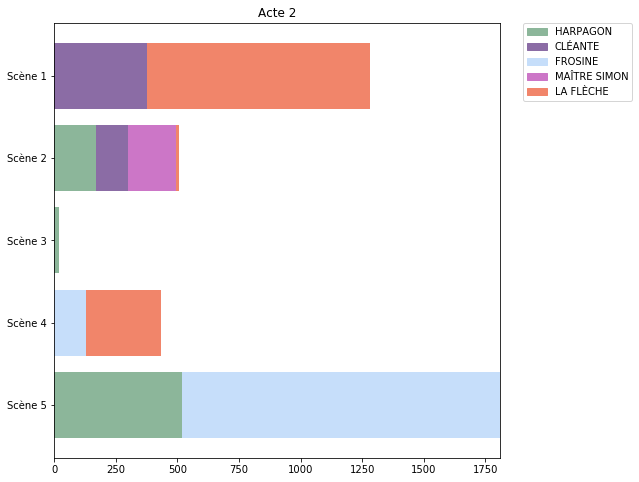

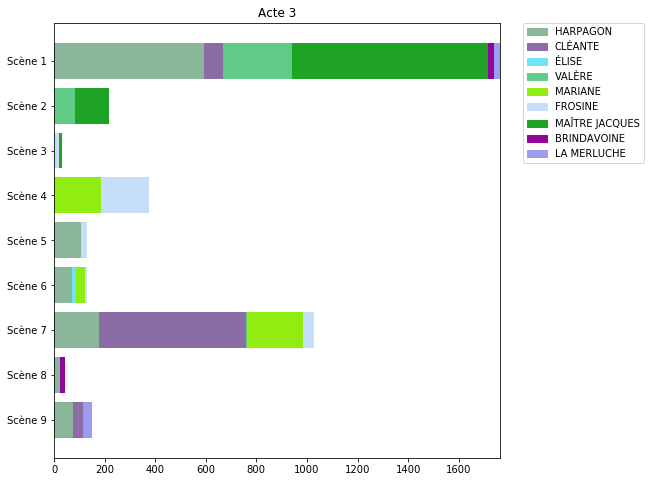

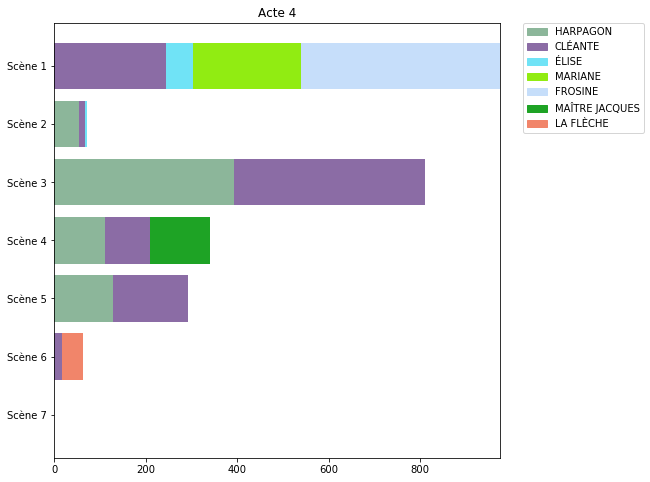

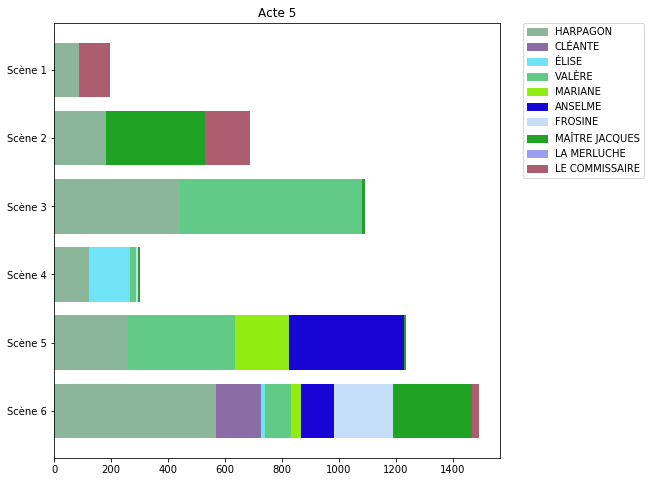

In [20]:
np.random.seed(0)
colors = np.random.rand(14,3)
for acte in range(1,6) :
    présents = []
    plt.figure(figsize=(8,8))
    x = np.zeros((len(dico_acte_nombre_mots[acte]),len(persos)))
    labels = persos
    for scene in range(1,len(dico_acte_nombre_mots[acte])+1) :
        for l,perso in enumerate(persos) :
                x[scene-1,l] += dico_acte_nombre_mots[acte][scene][perso]
    plt.title('Acte ' + str(acte))
    #plt.bar(labels,x)
    width = 1/2  # épaisseur de chaque bâton
    # Création du diagramme en bâtons (bâtons côte à côte)
    for scene in range(1,len(dico_acte_nombre_mots[acte])+1) :
        bt = 0
        for l,perso in enumerate(persos) :
            plt.barh(-scene, x[scene-1,l],left = bt,color=colors[l])
            bt += x[scene-1,l]
            if  x[scene-1,l] > 0 :
                if not (perso in présents) :
                    présents.append(perso)
    plt.yticks(-np.arange(scene)-1, np.array(["Scène "+str(k) for k in range(1,scene+1)]))
    patches = []
    présents.sort()
    for l,perso in enumerate(persos) :
        if perso in présents :
            patches.append(mpatches.Patch(color=colors[l], label=perso))
    plt.legend(handles=patches,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

# Petite étude critique

L'étude suivante donne un bon ordre de grandeur du nombre de mots par personnage. Pourtant, il resterait, en partie à :
- vérifier si chaque réplique est précéde du nom du personnage, de façon homogène
- vérifier s'il n'y a pas de défaut synthaxique dans le texte.

Par exemple, nous avons repéré et non traité l'erreur suivante:

In [21]:
print(lignes[1343][30:43])

 mainJe vous 
